In [13]:
%load_ext autoreload
%autoreload 2

from deepSculpt.manager.tools.plotter import Plotter
from deepSculpt.curator.tools.preprocessing import OneHotEncoderDecoder, RGBEncoderDecoder

import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



 🔽 Just created 'volume_data' shaped (50, 16, 16, 16) and 'material_data' shaped(50, 16, 16, 16)

 🔽 Plotting [27-02-2023-12-16-09]

 ✅ Just created a snapshot image[27-02-2023-12-16-09].png @ /Users/juan-garassino/code/juan-garassino/deepSculpt/data/preprocess_collection/picture

 🆗 Just ploted 'volume_data[37]' and 'material_data[37]'


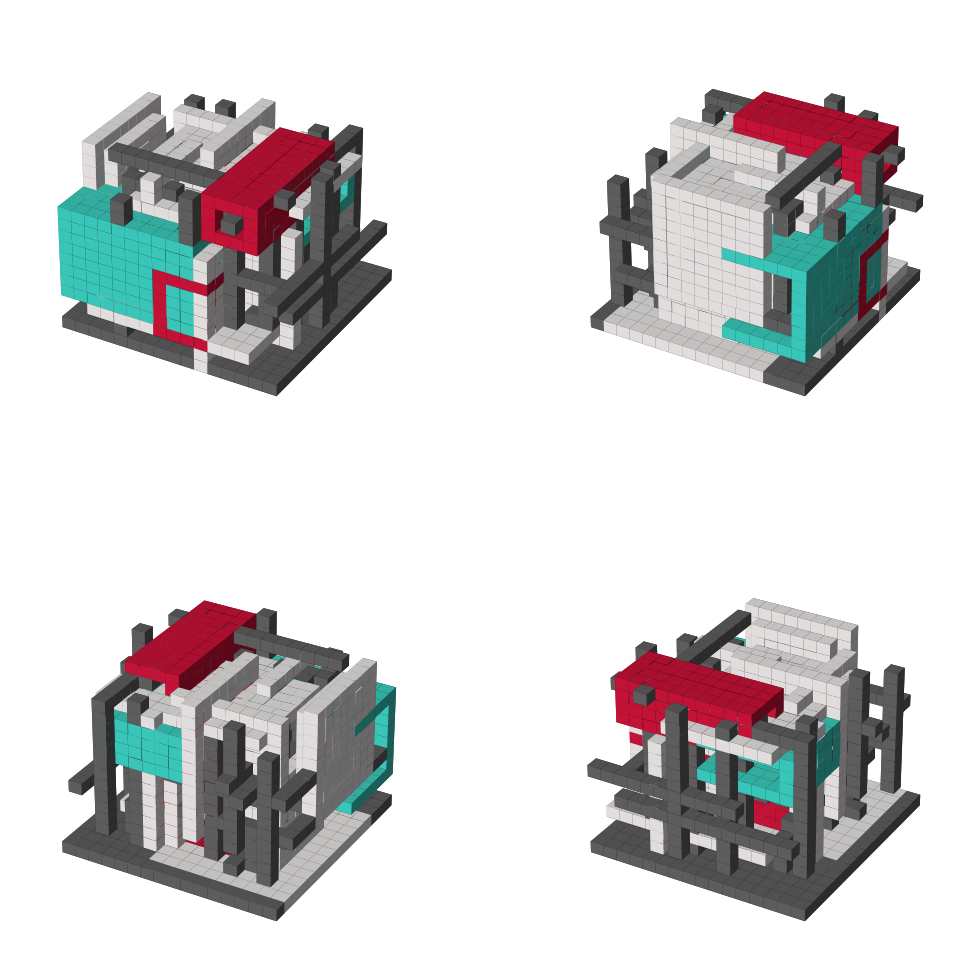

In [2]:
from deepSculpt.collector.collector import Collector

collector = Collector(
    void_dim=int(os.environ.get("VOID_DIM")),
    edge_elements=(40, 0.7, 0.9),
    plane_elements=(15, 0.4, 0.9),
    volume_elements=(5, 0.3, 0.7),
    step=None,
    directory='.',
    n_samples=50,
    grid=1,
)

# Creates the data
volumes_void, materials_void = collector.create_collection()

In [27]:
cloud = Plotter().voxel_to_pointscloud(volumes_void[35], 3)

Plotter.plot_pointscloud(cloud[:, 0], cloud[:, 1], cloud[:, 2])

In [5]:
preprocessing_class_o = OneHotEncoderDecoder(materials_void, verbose=1)

o_encode, o_classes = preprocessing_class_o.ohe_encode()


 🔀 A number of 50 samples shaped (50, 16, 16, 16) have been encoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]


In [6]:
decode_volumes_void, decode_materials_void = preprocessing_class_o.ohe_decode(o_encode)



 🔀 A number of 50 samples shaped (50, 16, 16, 16, 6) have been decoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]



 🔽 Plotting [27-02-2023-12-16-34]

 ✅ Just created a snapshot image[27-02-2023-12-16-34].png @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/picture


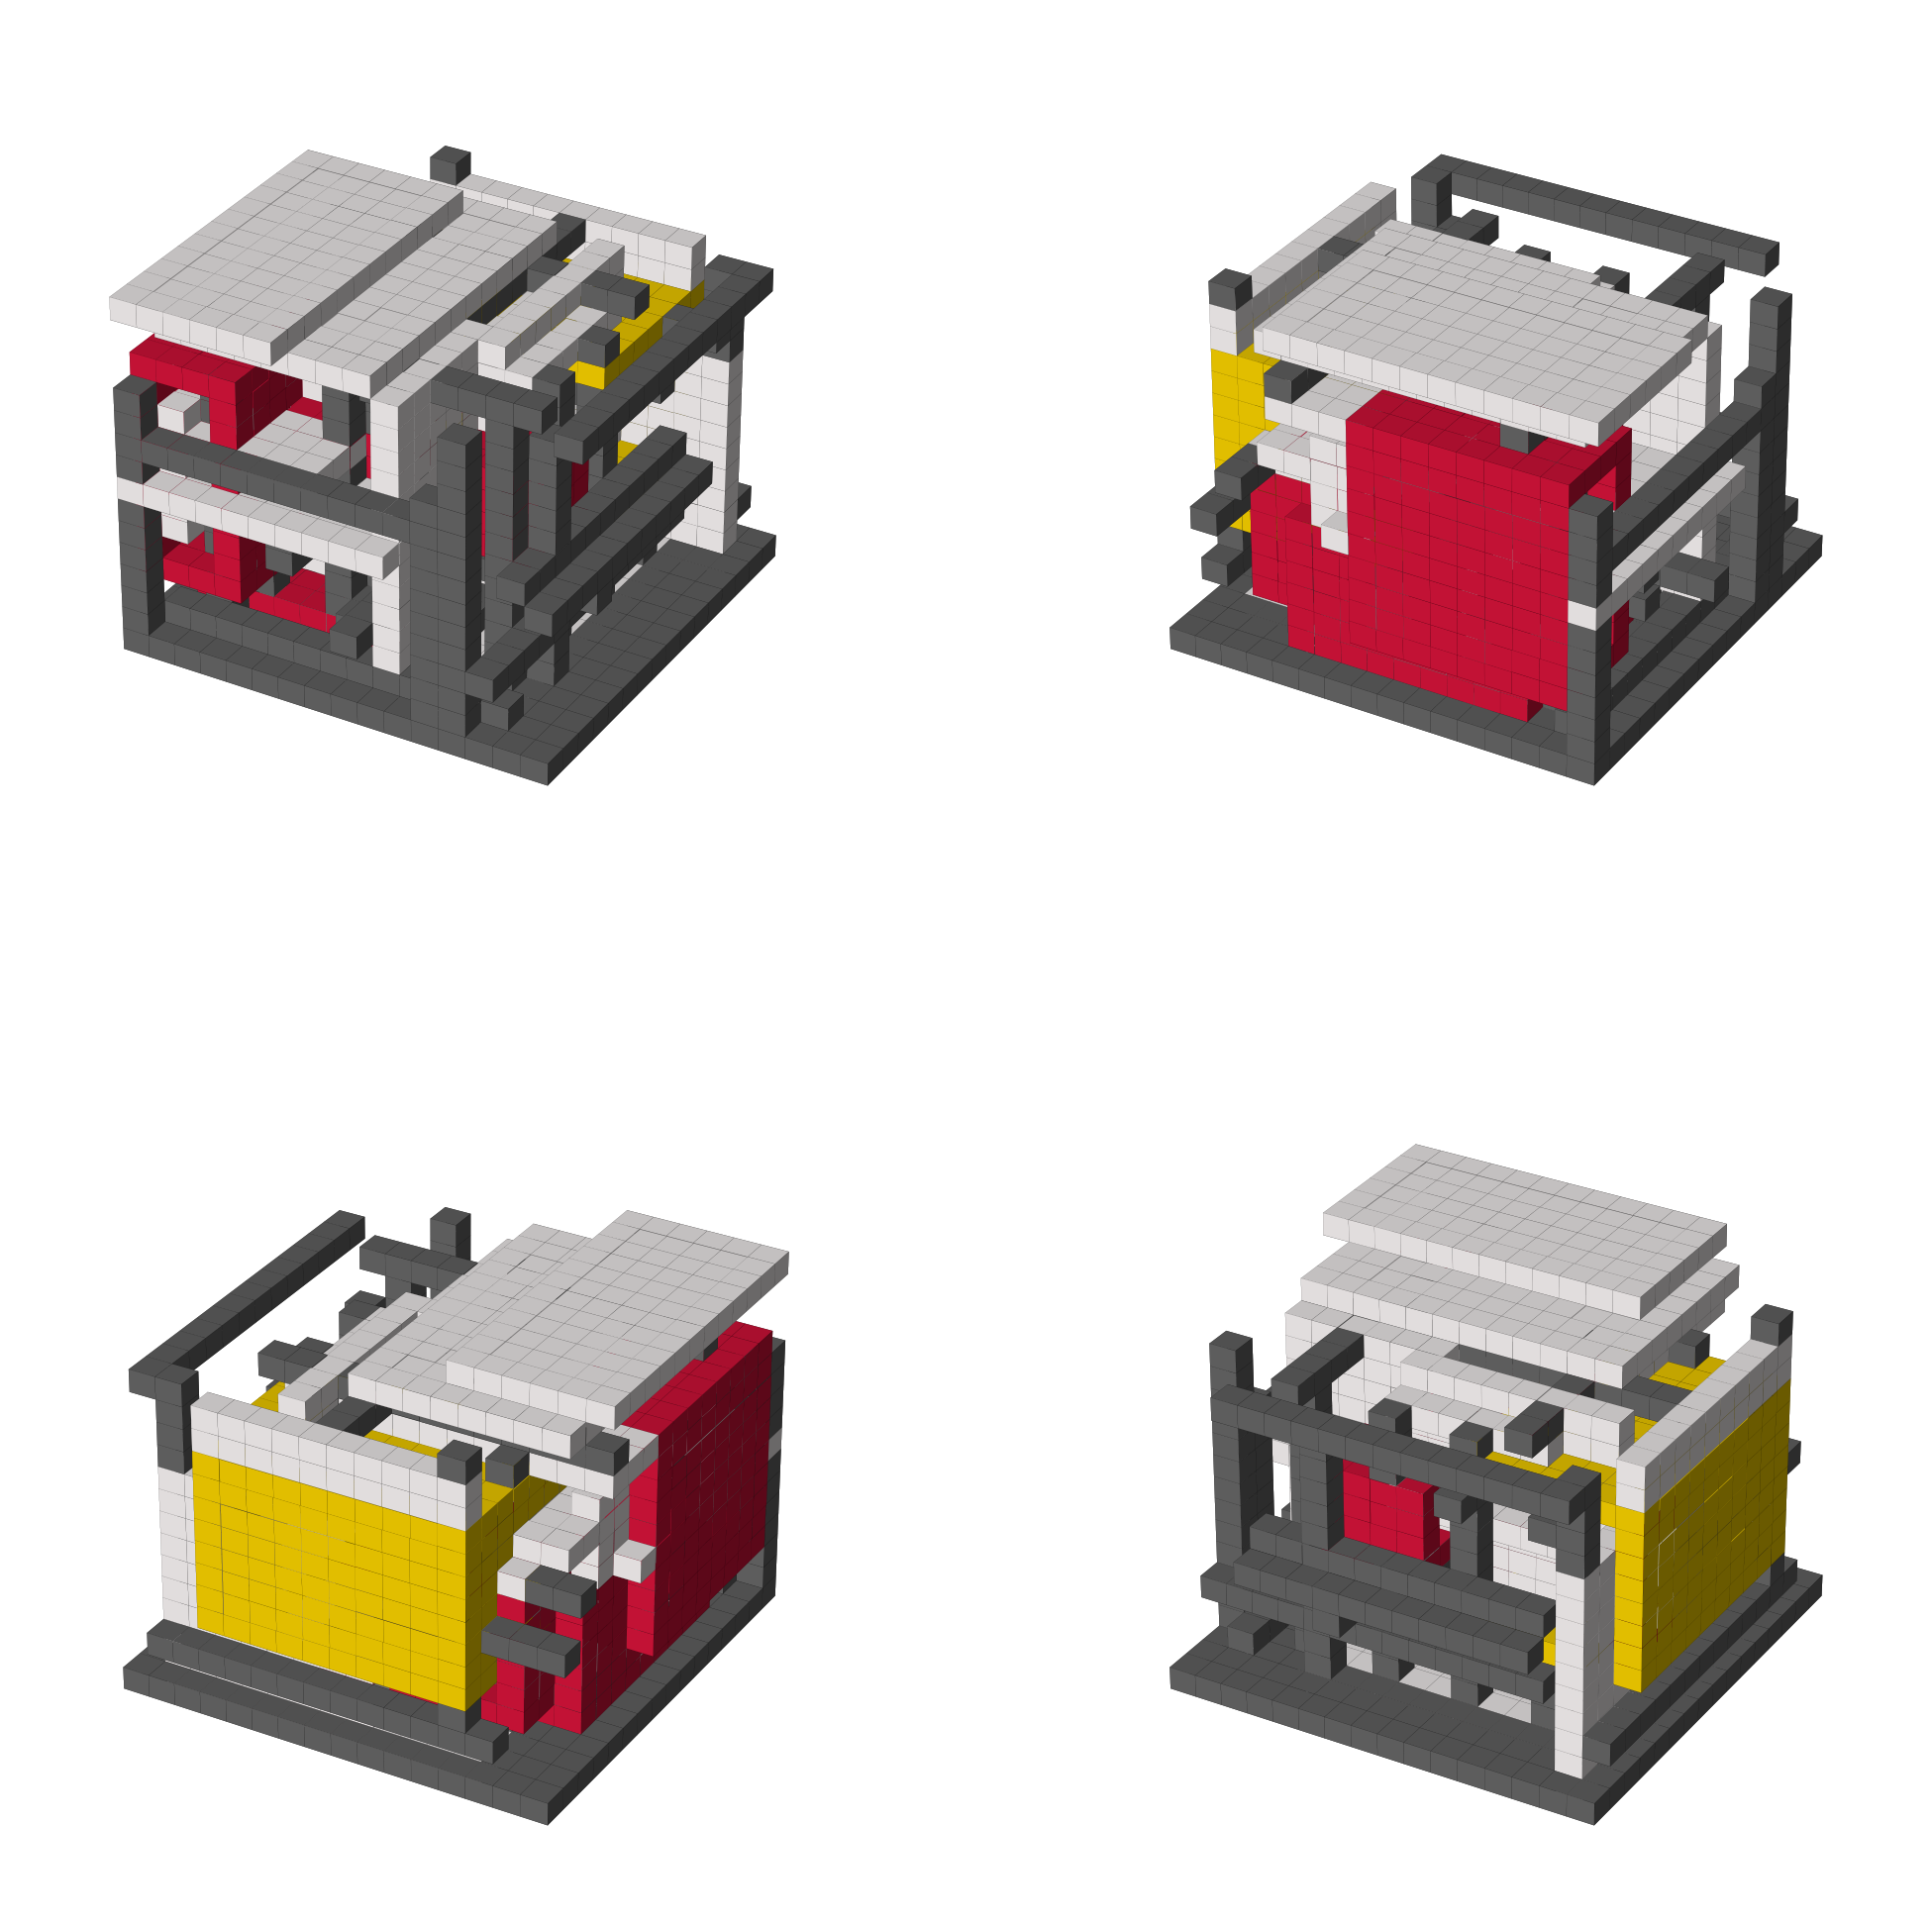

In [7]:
plot = Plotter(volumes=decode_volumes_void[0, :, :, :],
               colors=decode_materials_void[0, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir, raster_picture=True, hide_axis=True)


 🔽 Plotting [27-02-2023-12-17-01]


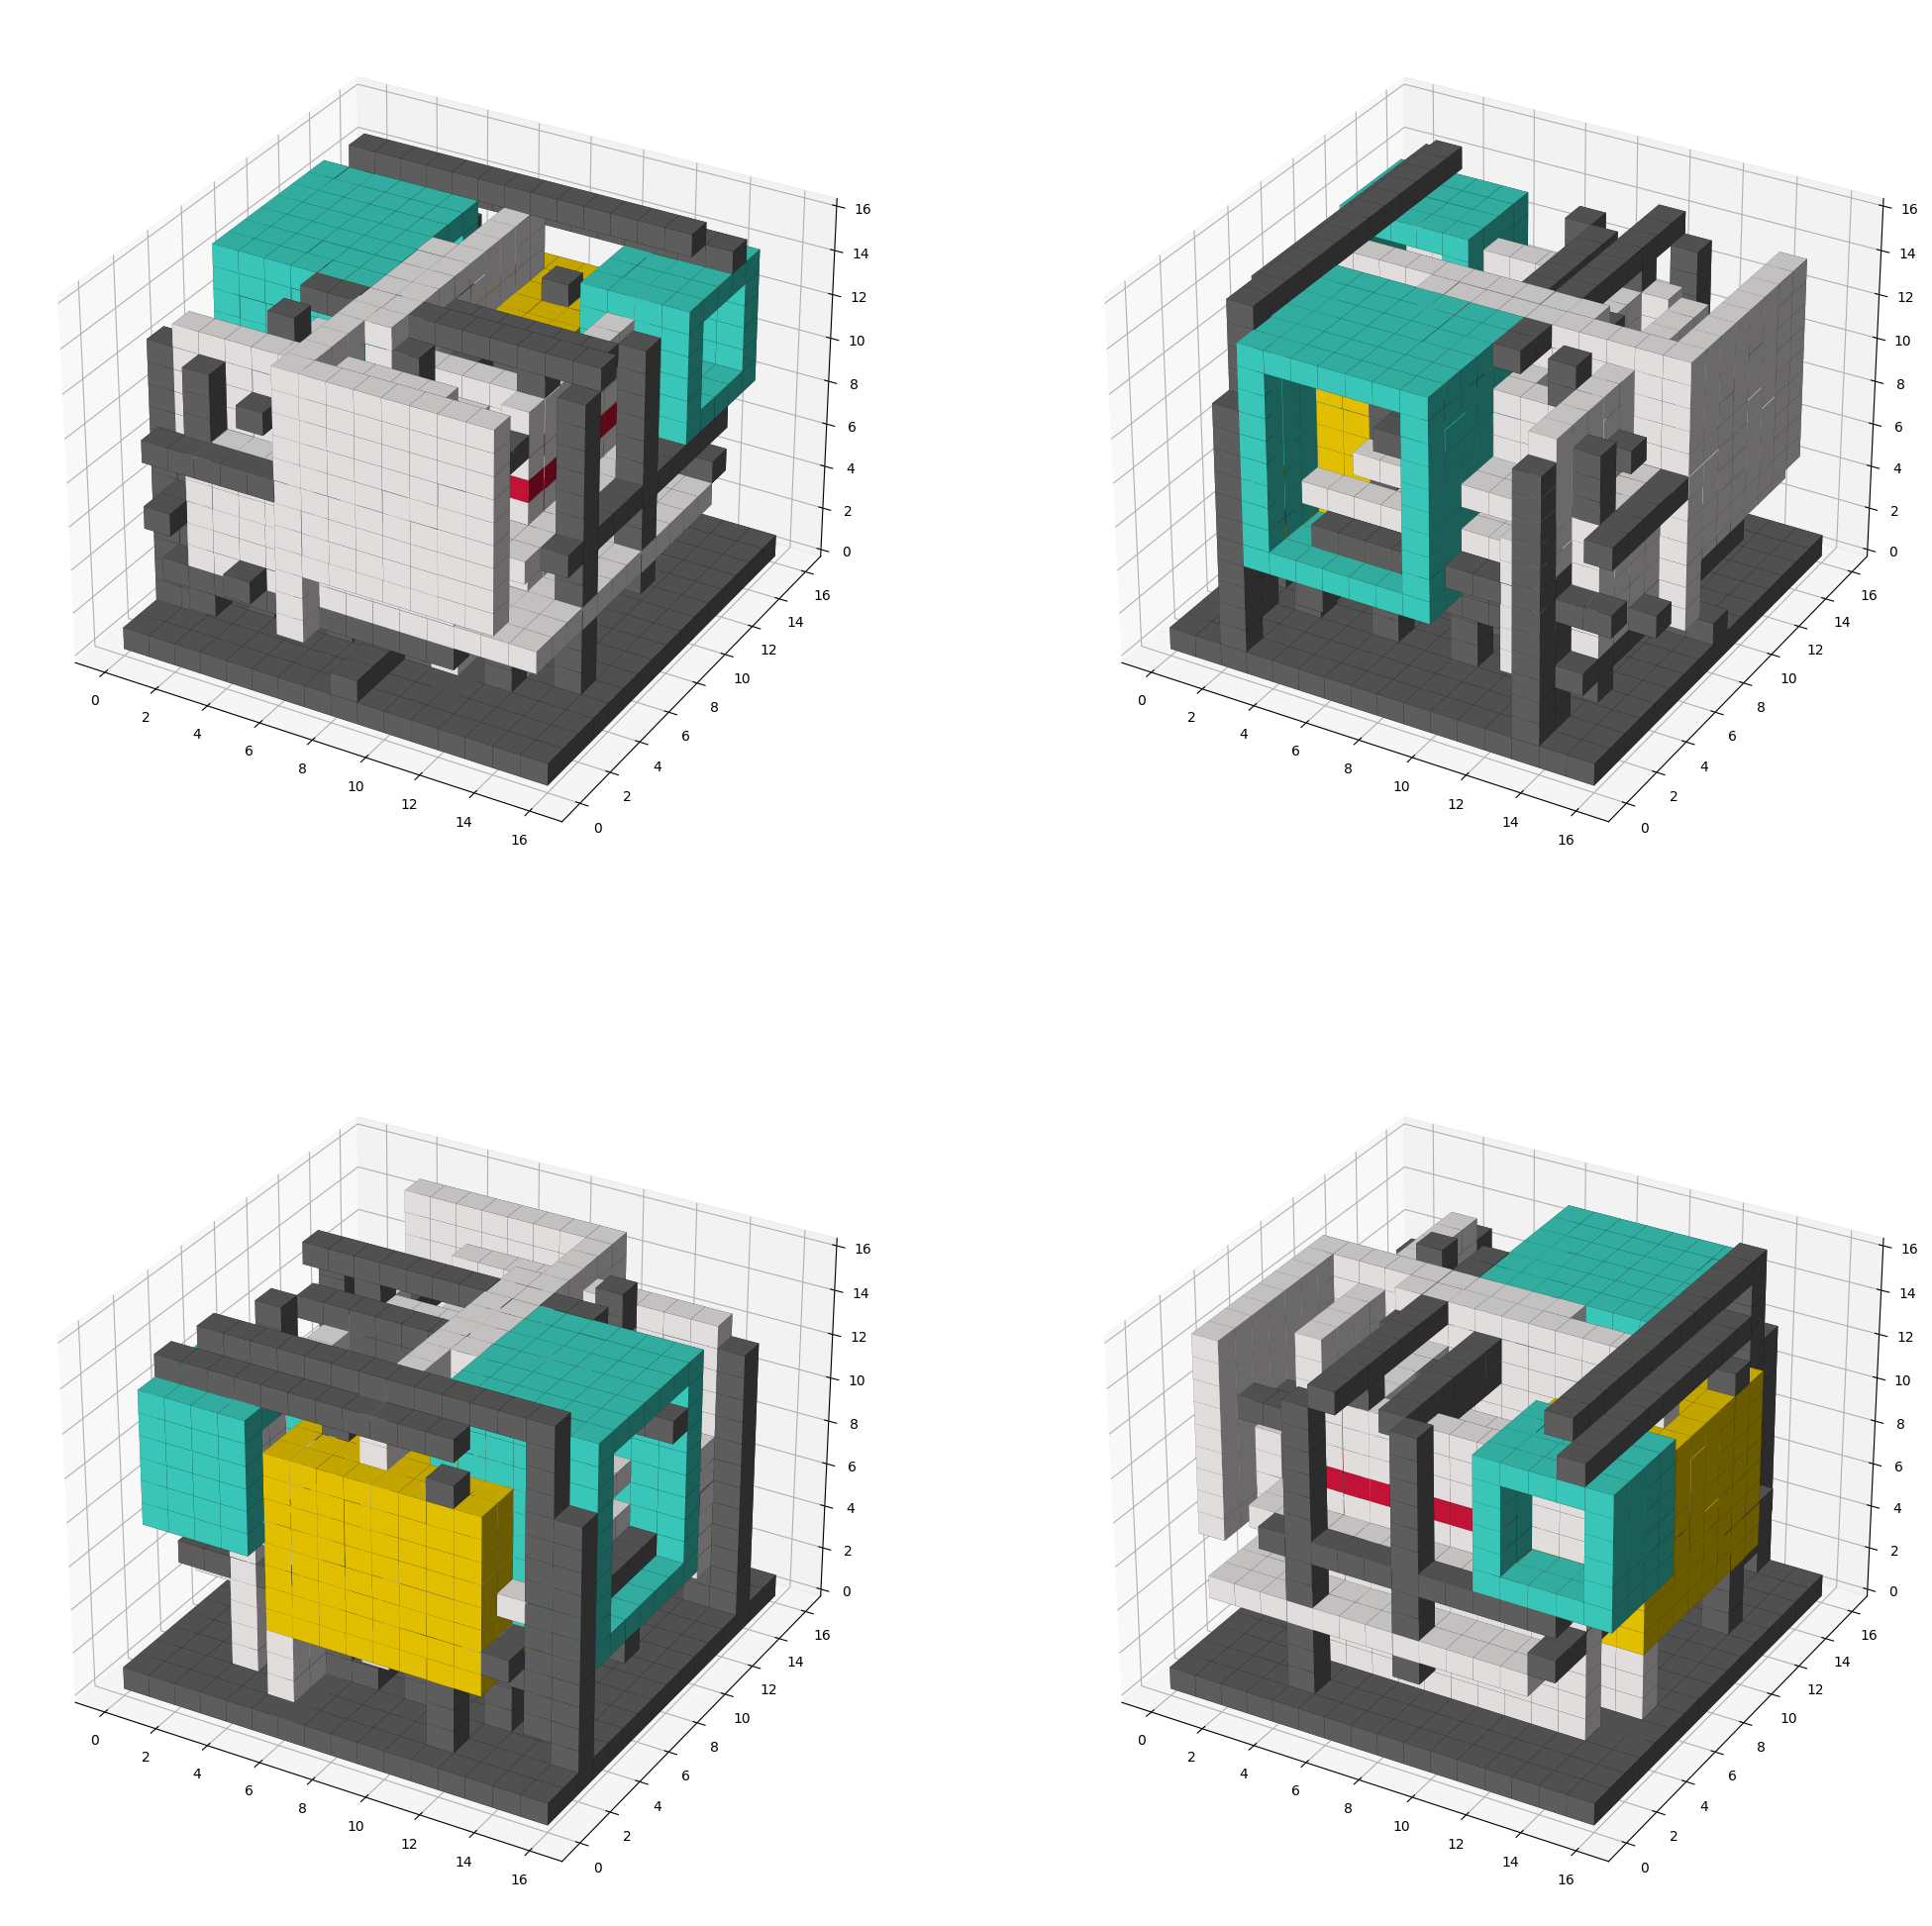

In [8]:
plot = Plotter(volumes=decode_volumes_void[3, :, :, :],
               colors=decode_materials_void[3, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir)

In [11]:
rgbencoder = RGBEncoderDecoder()

rgb_encoded = rgbencoder.decode_color_array(materials_void)

rgb_encoded.shape

(50, 16, 16, 16, 3)

In [24]:
test_volumes, test_colors = rgbencoder.encode_color_array(rgb_encoded)

test_volumes.shape

(50, 16, 16, 16)


 🔽 Plotting [27-02-2023-12-21-46]


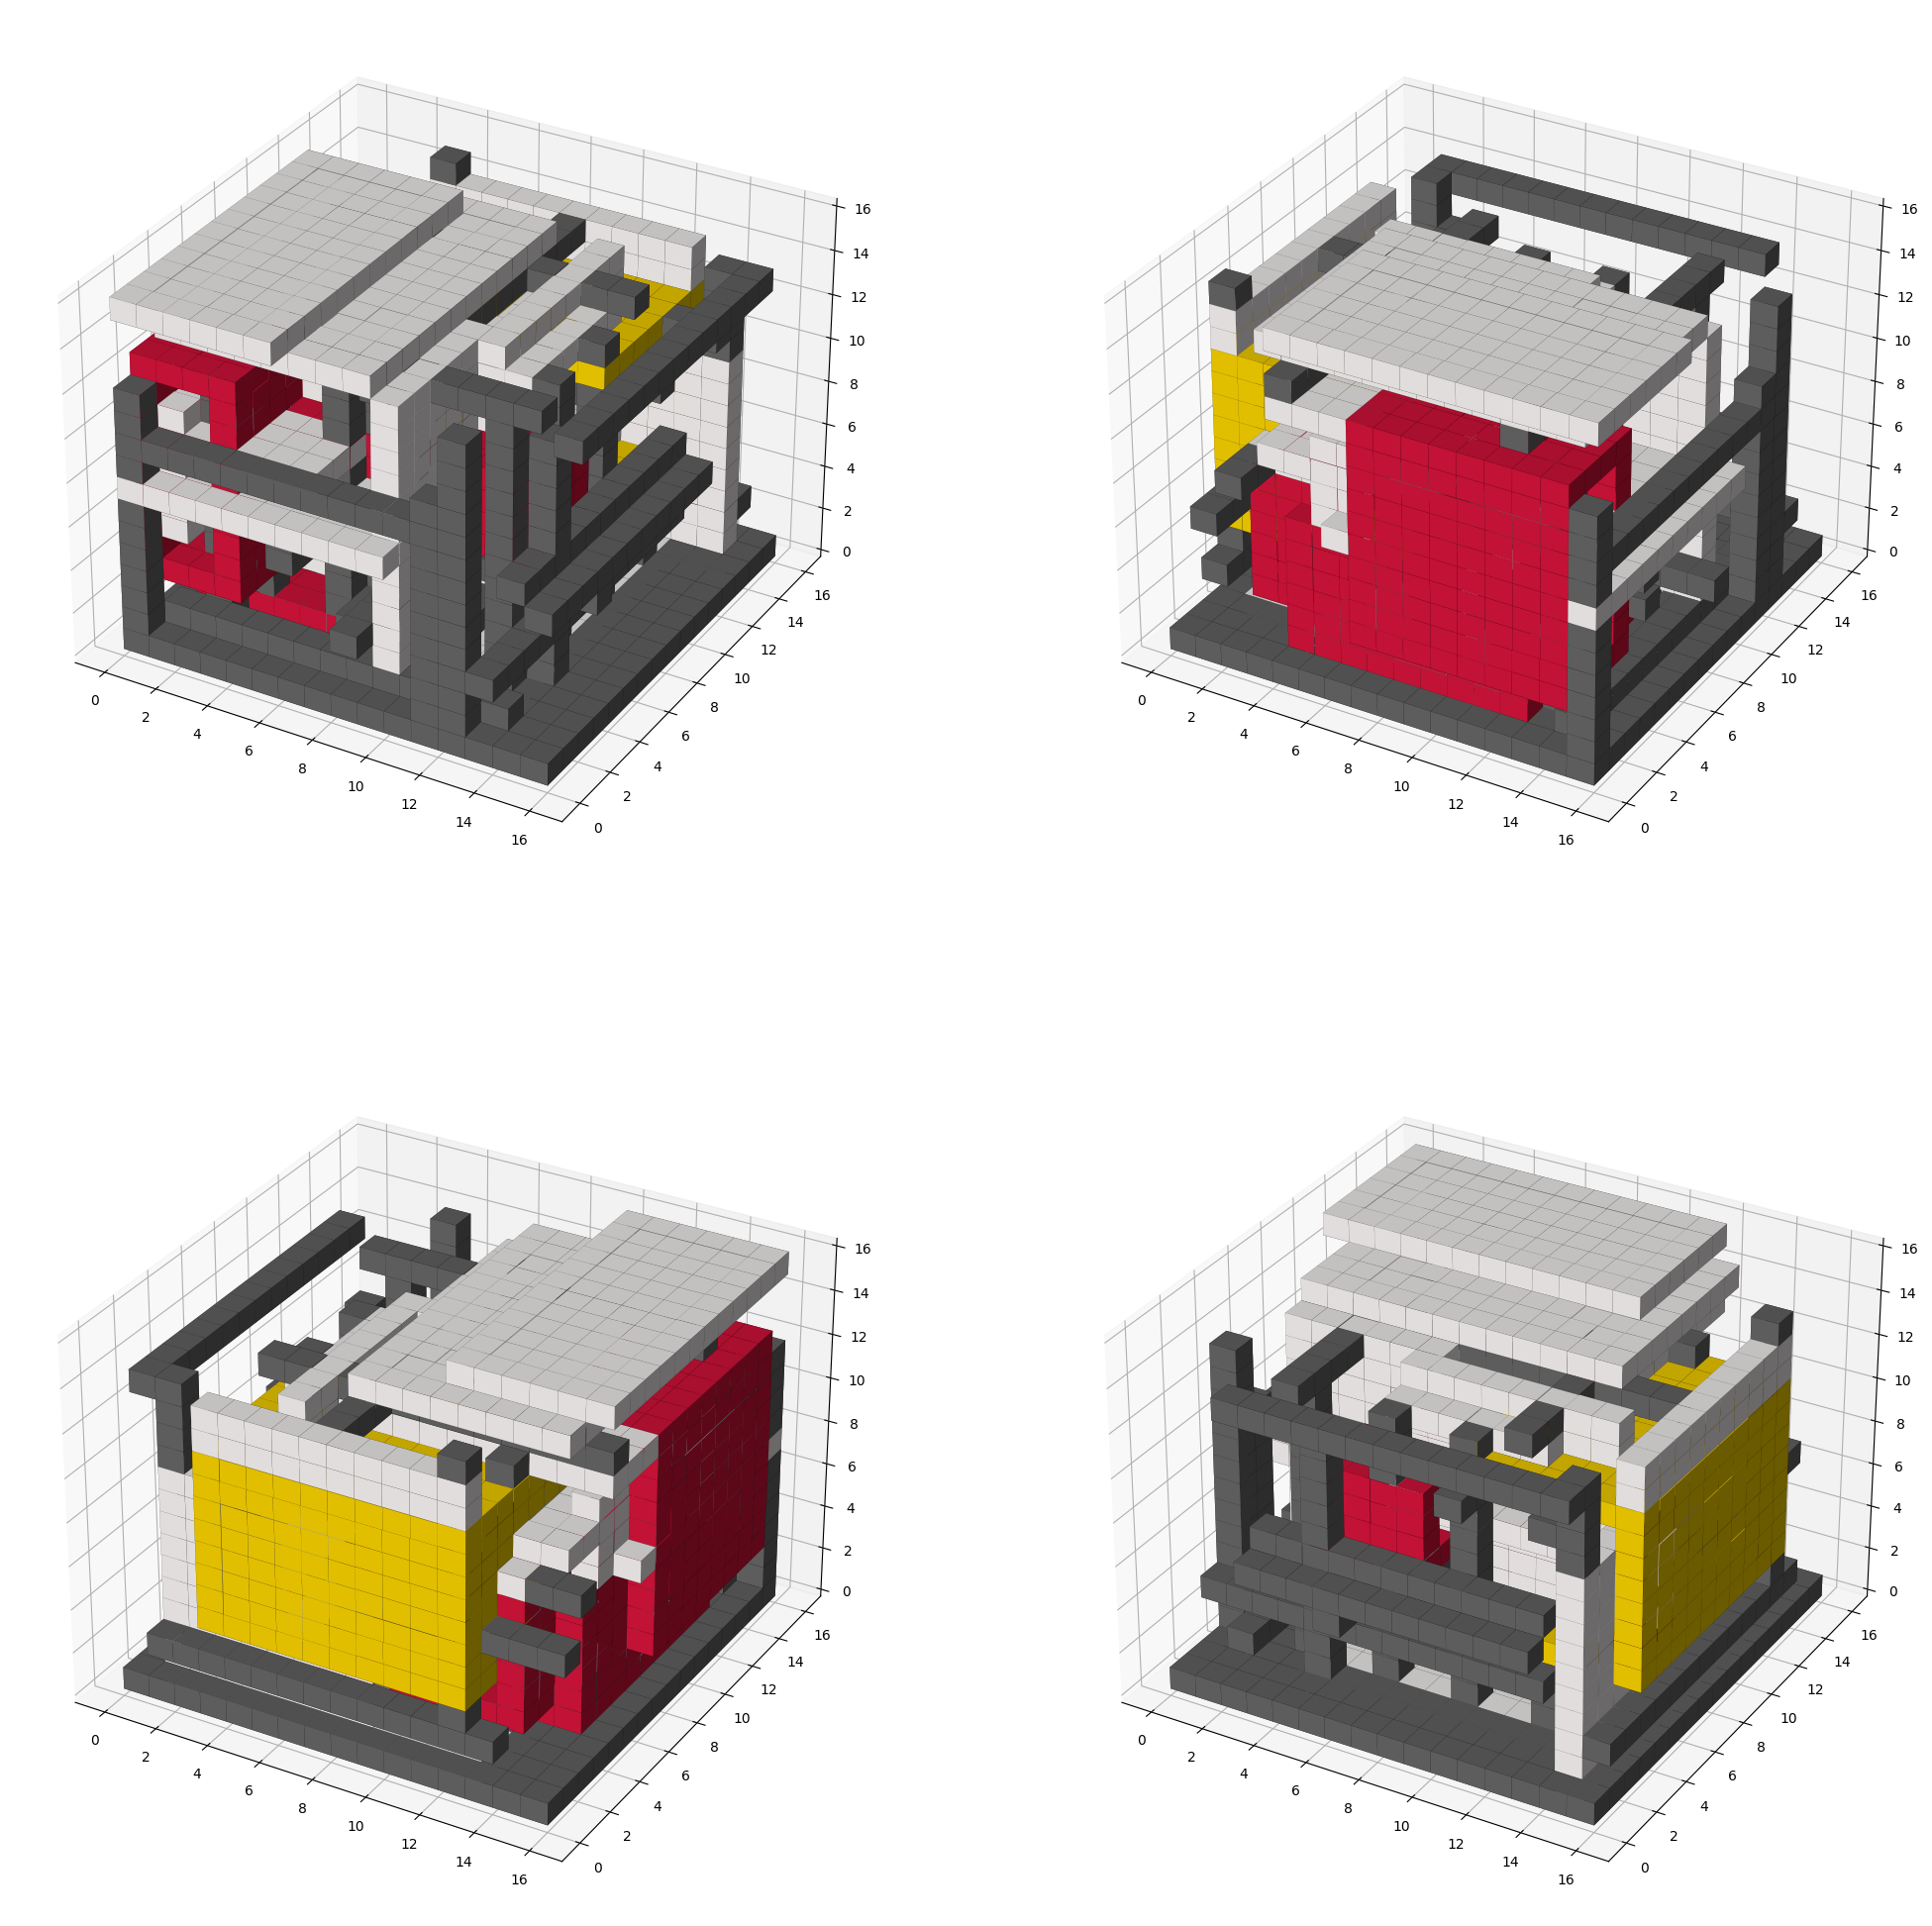

In [23]:
plot = Plotter(volumes=test_volumes[0], colors=test_colors[0])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir)